資管碩一 李如芹 111356019

資管碩一 楊庭瑄 111356028


Title：
**Web page phishing detection**

Problem：
Phishing continues to prove one of the most successful and effective ways for cybercriminals to defraud us and steal our personal and financial information. We would like to deal with this problem by implementing web page phishing detection, so that the model could tell us whether the web page is safe.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import & Read data

In [ ]:
# Kaggle dataset url = https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset?resource=download
# The dataset from this url above

from google.colab import files
uploaded = files.upload()

Saving dataset_phishing.csv to dataset_phishing.csv


In [ ]:
df=pd.read_csv("dataset_phishing.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [ ]:
# 將 status 從 string 轉為 int / legitimate -> 0; phishing -> 1
classes={'legitimate':0, 'phishing':1}
df['status'] = df['status'].map(classes)
df['status']

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [ ]:
# check whether the dataset is balance or not
print(sum(df['status'] == 0))
print(sum(df['status'] == 1))

5715
5715




*   **This dataset is balanced**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

*  **This dataset without missing data.**

# Feature selection
### RFE method






*   RFE 基於對模型表現的貢獻來選擇特徵。
*   RFE 使用迴歸模型來評估每個特徵的重要性，並反覆消除對模型貢獻較小的特徵



In [ ]:
from sklearn.feature_selection import RFE as RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
!pip install feature-engine
from feature_engine.selection import RecursiveFeatureElimination

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 6.9 MB/s eta 0:00:00


In [ ]:
X = df.select_dtypes(include=['number']).copy()
X = X.drop(["status"], axis=1)
y = df["status"]



*   find the elbow index for deciding estimator value



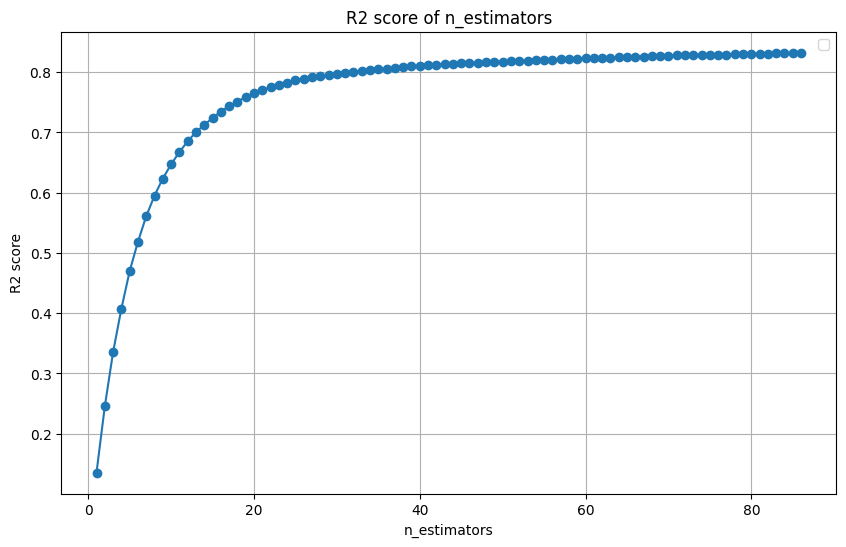

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

cv_scores = []

# run through the n_estimators values
for n_estimators in range(1, 87):
    model = GradientBoostingRegressor(n_estimators = n_estimators, random_state = 42)
    scores = cross_val_score(model, X, y, cv=2, scoring='r2')

    # Store the mean R2 score of the cross-validation
    cv_scores.append(np.mean(scores))

# find the highest R2 score
sorted_indices = np.argsort(cv_scores)[::-1]

# Calculate the first differences of the R2 scores
diff = np.diff(cv_scores)

# Calculate the second differences of the R2 scores
diff2 = np.diff(diff)

# Find the index of the elbow point
elbow_index = np.argmax(diff2) + 2

# Plot the R2 scores with the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 87), cv_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('R2 score')
plt.title('R2 score of n_estimators')

plt.legend()

plt.grid(True)
plt.show()

* **從上圖 R2 score 的走向，我們選擇了 n_estimatore = 30 進行後續的處理，進行降維的同時讓模型表現受到的影響最小。**

In [ ]:
# gradient boosting machine for regression, use it to evaluate the features during the search.
model = GradientBoostingRegressor(
    n_estimators = 30,
    random_state = 42,
)

In [ ]:
# feature elimination search, uses the previous gradient boosting machine and the R2 to evaluate the feature subsets using 2-fold cross-validation
RFE_model = RecursiveFeatureElimination(
    estimator = model, # evaluate the feature subsets
    scoring = 'r2',
    threshold = 0.001,  # minimum acceptable decrease
    cv = 2, # number of cross-validation folds
)

# start the search to remove those features that cause a decrease in R2 greater than 0.001
RFE_model.fit(X, y)

RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingRegressor(n_estimators=30,
                                                                random_state=42),
                            scoring='r2', threshold=0.001)

In [ ]:
# the performance of the gradient boosting machine trained
RFE_model.initial_model_performance_

0.7969319396120544

In [ ]:
RFE_model.features_to_drop_

['length_url',
 'length_hostname',
 'ip',
 'nb_hyphens',
 'nb_at',
 'nb_and',
 'nb_or',
 'nb_eq',
 'nb_underscore',
 'nb_tilde',
 'nb_percent',
 'nb_slash',
 'nb_star',
 'nb_colon',
 'nb_comma',
 'nb_semicolumn',
 'nb_dollar',
 'nb_space',
 'nb_com',
 'nb_dslash',
 'http_in_path',
 'https_token',
 'ratio_digits_url',
 'punycode',
 'port',
 'tld_in_path',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'random_domain',
 'shortening_service',
 'path_extension',
 'nb_redirection',
 'nb_external_redirection',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'brand_in_subdomain',
 'brand_in_path',
 'suspecious_tld',
 'statistical_report',
 'ratio_intHyperlinks',
 'ratio_extHyperlinks',
 'ratio_nullHyperlinks',
 'nb_extCSS',
 'ratio_intRedirection',
 'ratio_extRedirection',
 'ratio_intErrors',
 'ratio_extErrors',
 'login_form'

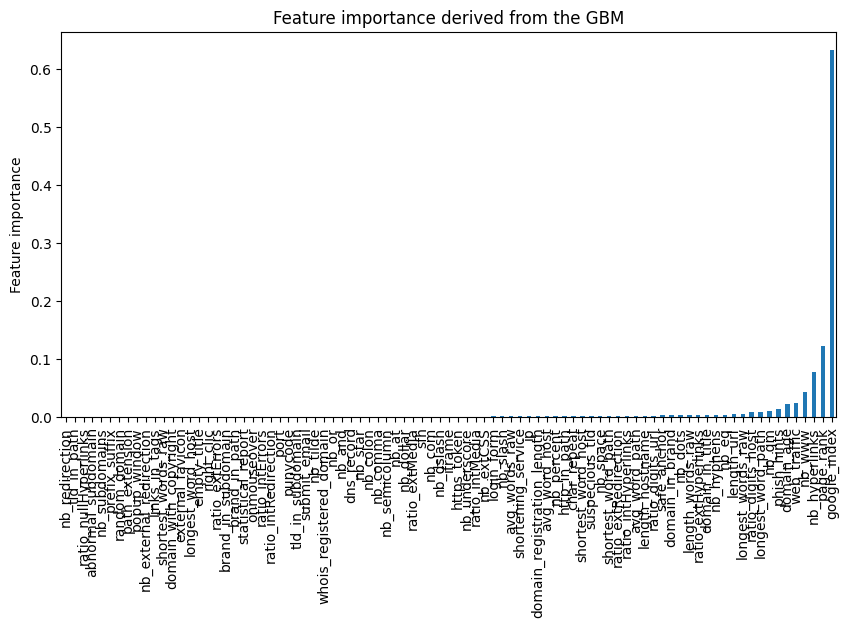

In [ ]:
RFE_model.feature_importances_.plot.bar(figsize=(10, 5))
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the GBM')
plt.show()

In [ ]:
# X_RFE = RFE_model.transform(X_train)
X_RFE = RFE_model.transform(X)

# 查看留下的 features
X_RFE

,nb_dots,nb_qm,nb_www,ratio_digits_host,length_words_raw,longest_word_path,phish_hints,domain_in_brand,nb_hyperlinks,domain_age,web_traffic,google_index,page_rank
0,3,0,1,0.000000,4,6,0,0,17,-1,0,1,4
1,1,0,0,0.000000,4,32,0,0,30,5767,0,1,2
2,4,1,0,0.000000,12,17,0,0,4,4004,5828815,1,0
3,2,0,0,0.000000,1,0,0,0,149,-1,107721,0,3
4,2,0,1,0.000000,6,11,0,0,102,8175,8725,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,2,0,1,0.000000,4,11,0,0,199,5396,3980,0,6
11426,5,1,1,0.000000,12,8,0,0,3,6728,0,1,0
11427,2,1,1,0.000000,13,15,0,1,68,8515,8,1,10
11428,2,0,1,0.000000,2,0,0,0,32,2836,2455493,0,4


# Correlation feature selection



*   特徵選擇方法是針對特徵的重要性進行排序，選擇重要性較高的特徵。



In [ ]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [ ]:
corr_matrix = df.corr()
corr_matrix['status']

<ipython-input-18-34af2f7335ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [45]:
corr_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


In [ ]:
status_corr = corr_matrix['status']
status_corr.shape

(88,)

In [ ]:
def feature_selector_correlation(cmatrix, threshold):
    selected_features = []
    feature_score = []
    i = 0
    for score in cmatrix:
        if abs(score) > threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i += 1
    result = list(zip(selected_features, feature_score))
    return result

In [ ]:
features_selected = feature_selector_correlation(status_corr, 0.25)
features_selected

[('ip', ['0.321698']),
 ('nb_qm', ['0.294319']),
 ('nb_www', ['-0.443468']),
 ('ratio_digits_url', ['0.356395']),
 ('phish_hints', ['0.335393']),
 ('nb_hyperlinks', ['-0.342628']),
 ('domain_in_title', ['0.342807']),
 ('domain_age', ['-0.331889']),
 ('google_index', ['0.731171']),
 ('page_rank', ['-0.511137']),
 ('status', ['1.000000'])]

In [ ]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

['ip',
 'nb_qm',
 'nb_www',
 'ratio_digits_url',
 'phish_hints',
 'nb_hyperlinks',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [ ]:
len(selected_features)

10

In [ ]:
corr_selected = df[selected_features]
corr_selected

,ip,nb_qm,nb_www,ratio_digits_url,phish_hints,nb_hyperlinks,domain_in_title,domain_age,google_index,page_rank
0,0,0,1,0.000000,0,17,0,-1,1,4
1,1,0,0,0.220779,0,30,1,5767,1,2
2,1,1,0,0.150794,0,4,1,4004,1,0
3,0,0,0,0.000000,0,149,1,-1,0,3
4,0,0,1,0.000000,0,102,0,8175,0,6
...,...,...,...,...,...,...,...,...,...,...
11425,0,0,1,0.000000,0,199,0,5396,0,6
11426,0,1,1,0.023810,0,3,1,6728,1,0
11427,1,1,1,0.142857,0,68,0,8515,1,10
11428,0,0,1,0.000000,0,32,1,2836,0,4



*   Compare two datasets



In [ ]:
# set columns for compare purpose
corr_selected_features = set(corr_selected.columns)
x_rfe_features = set(X_RFE.columns)

In [ ]:
# find different column
features_only_in_ranfor = corr_selected_features - x_rfe_features
features_only_in_x_rfe = x_rfe_features - corr_selected_features

print("Features only in corr_selected:")
print(features_only_in_ranfor)
print("Features only in X_RFE:")
print(features_only_in_x_rfe)

Features only in corr_selected:
{'domain_in_title', 'ip', 'ratio_digits_url'}
Features only in X_RFE:
{'length_words_raw', 'ratio_digits_host', 'domain_in_brand', 'nb_dots', 'longest_word_path', 'web_traffic'}


**不同的特徵選擇方法可能給出不同的特徵重要性排序，從而導致選擇不同數量的特徵。**

# Training Models：
* random forest
* xgboost
* SVM
* Linear Regression

## Random forest model using corr_selected

In [ ]:
# Random forest

X = corr_selected
y = df['status']
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Create a Random Forest model
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Fit the model to the training data
model.fit(X_train_corr, y_train_corr)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred_corr = model.predict(X_test_corr)

# Evaluate the model's performance
accuracy_rf_corr = accuracy_score(y_test_corr, y_pred_corr)
print("Accuracy:", accuracy_rf_corr)

Accuracy: 0.9536307961504812


## Random forest using X_RFE feature selection

In [ ]:
# random forest using X_RFE feature selection
X = X_RFE
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Create a Random Forest model
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy_rf_rfe = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_rfe)

Accuracy: 0.9623797025371829


## xgboost using corr_selected

In [ ]:
# xgboost using corr_selected
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train_corr, y_train_corr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_corr = model.predict(X_test_corr)
accuracy_xgb_corr = accuracy_score(y_test_corr, y_pred_corr)
print("Accuracy:", accuracy_xgb_corr)

Accuracy: 0.9536307961504812


## xgboost using X_RFE feature selection

In [ ]:
# xgboost using X_RFE feature selection
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_xgb_rfe = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb_rfe)

Accuracy: 0.9693788276465442


## SVM using corr_selected

In [ ]:
# SVM using corr_selected
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_corr, y_train_corr)

SVC()

In [ ]:
y_pred_corr = model.predict(X_test_corr)
accuracy_svm_corr = accuracy_score(y_test_corr, y_pred_corr)
print("Accuracy:", accuracy_svm_corr)

Accuracy: 0.7038495188101487


## SVM using X_RFE feature selection

In [ ]:
# SVM using X_RFE feature selection
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_svm_rfe = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm_rfe)

Accuracy: 0.5962379702537183


## Logistic regression using corr_selected

In [ ]:
# Logistic regression using corr_selected
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_corr, y_train_corr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_corr = model.predict(X_test_corr)
accuracy_lr_corr = accuracy_score(y_test_corr, y_pred)
print("Accuracy:", accuracy_lr_corr)

Accuracy: 0.5962379702537183


## Logistic regression using X_RFE feature selection

In [ ]:
# Logistic regression using X_RFE feature selection
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_lr_rfe = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr_rfe)

Accuracy: 0.6544181977252843


## Conclusion

In [ ]:
print("Accuracy of correlation pre-process and random forest:\n", accuracy_rf_corr)
print("Accuracy of RFE pre-process and random forest:\n", accuracy_rf_rfe)
print("Accuracy of correlation pre-process and xgboost:\n", accuracy_xgb_corr)
print("Accuracy of RFE pre-process and xgboost:\n", accuracy_xgb_rfe)
print("Accuracy of correlation pre-process and SVM:\n", accuracy_svm_corr)
print("Accuracy of RFE pre-process and SVM:\n", accuracy_svm_rfe)
print("Accuracy of correlation pre-process and logistic regression:\n", accuracy_lr_corr)
print("Accuracy of RFE pre-process and logistic regression:\n", accuracy_lr_rfe)

Accuracy of correlation pre-process and random forest:
 0.9536307961504812
Accuracy of RFE pre-process and random forest:
 0.9623797025371829
Accuracy of correlation pre-process and xgboost:
 0.9536307961504812
Accuracy of RFE pre-process and xgboost:
 0.9693788276465442
Accuracy of correlation pre-process and SVM:
 0.7038495188101487
Accuracy of RFE pre-process and SVM:
 0.5962379702537183
Accuracy of correlation pre-process and logistic regression:
 0.5962379702537183
Accuracy of RFE pre-process and logistic regression:
 0.6544181977252843


* **使用 RFE pre-process 及 xgboost 可以有最佳的表現**

從以上結果可以得知：

1. RFE-based 的前處理通常表現較佳，證明 RFE 在進行特徵選取時的方法較適合此資料集。

2. Random Forest 及 XGBoost 表現較佳，我們認為是因為這兩種 model 適合處理較為複雜且高維度的資料，所以在此資料集下表現較佳

3. SVM 及 logistic regression 表現較差，我們認為是這兩種 model 對於資料的敏感度較高，所以可能需要專為 model 進行針對性的資料集前處理才能提高表現。

4. 在同樣的 pre-process 下，SVM 的表現較差，我們認為可能是因為 SVM 對於 scaling 較為敏感，在沒有進行 scaling 的情況下，可能會受到特徵尺度不一致導致偏重導致結論較差。

5. 由於 Logistic Regression 是一個線性模型，它假設資料之間的關係是線性的。這種線性模型通常適用於較簡單的資料集，其中變數之間的關係可以用一條直線或一個簡單的曲線來表示，所以在此資料集中會表現較差

**模型結論 -> 選擇適合的模型取決於資料集的特性和目標。在處理高維數據和複雜特徵關係時，Random Forest 和 XGBoost 會有較好的表現。而 SVM 的表現取決於資料集和模型的調整，可能需要更進一步的資料前處理。如果資料集較簡單且特徵之間呈現線性關係，則 Logistic Regression 可能是一個合適的選擇。**